In [4]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensuring plots are displayed inline in Jupyter notebooks
%matplotlib inline

# Preprocessing libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Model selection and cross-validation
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV

# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [5]:
from sklearn.model_selection import StratifiedKFold
kFold = StratifiedKFold(n_splits=5)
from sklearn.model_selection import GridSearchCV


In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report


In [10]:
#read the dataset
df=pd.read_csv("loan_data.csv")
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [12]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [14]:
df.isnull().sum().sum()

0

In [15]:
df.purpose.value_counts()

purpose
debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: count, dtype: int64

In [17]:
df['purpose']=LabelEncoder().fit_transform(df['purpose'])
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,2,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,2,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


Text(0.5, 0, 'FICO')

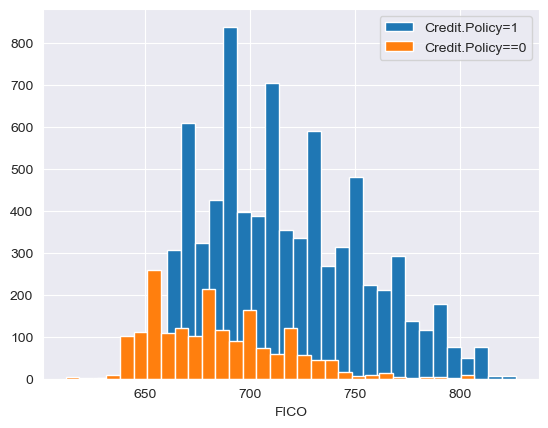

In [18]:
sns.set_style('darkgrid')
plt.hist(df['fico'].loc[df['credit.policy']==1],bins=30,label='Credit.Policy=1')
plt.hist(df['fico'].loc[df['credit.policy']==0],bins=30,label='Credit.Policy==0')
plt.legend()
plt.xlabel("FICO")


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 0, 'FICO')

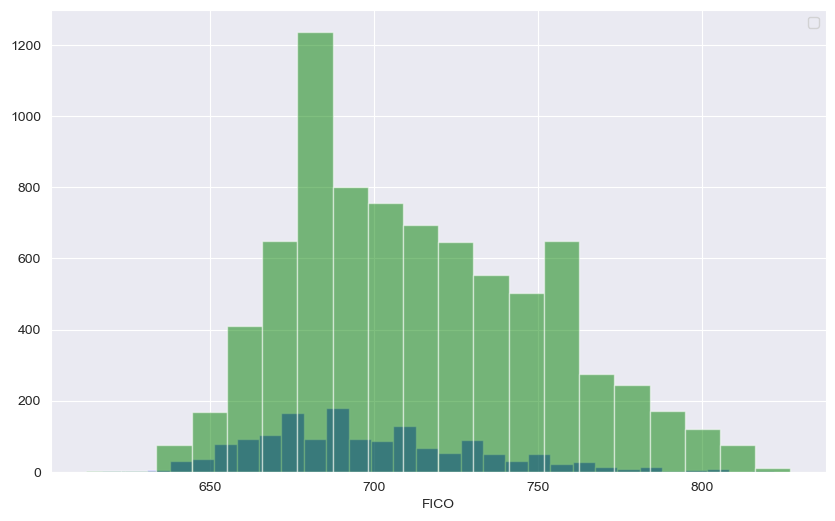

In [19]:
plt.figure(figsize=(10,6))
df[df['not.fully.paid']==1]['fico'].hist(bins=30, alpha=0.5, color='blue')
df[df['not.fully.paid']==0]['fico'].hist(bins=20, alpha=0.5, color='green')
plt.legend()
plt.xlabel('FICO')


<Axes: xlabel='purpose', ylabel='count'>

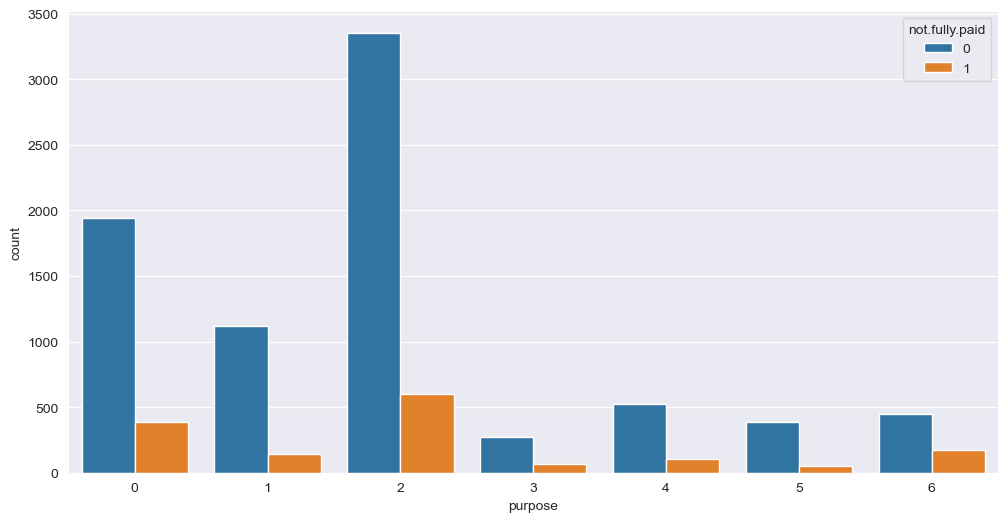

In [20]:
#creating a countplot to see the counts of purpose of loans by not fully paid
plt.figure(figsize=(12,6))
sns.countplot(data=df,x='purpose',hue='not.fully.paid')

<Figure size 1000x600 with 0 Axes>

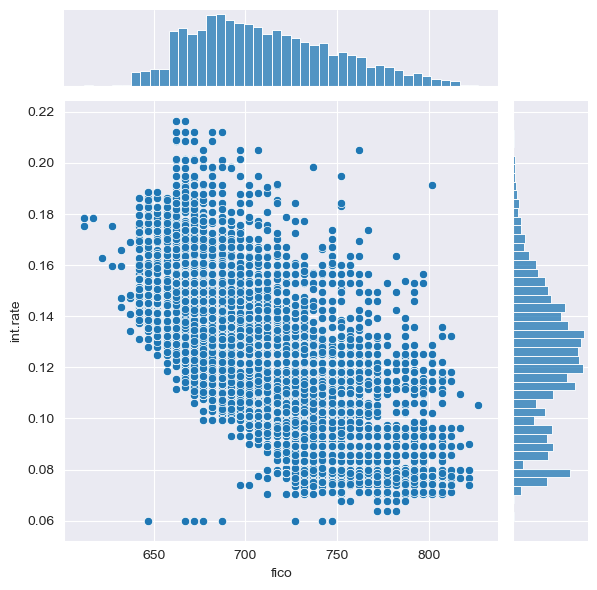

In [21]:
#checking the trend  between Fico and the interest rate
plt.figure(figsize=(10,6))
sns.jointplot(x='fico',y='int.rate',data=df)

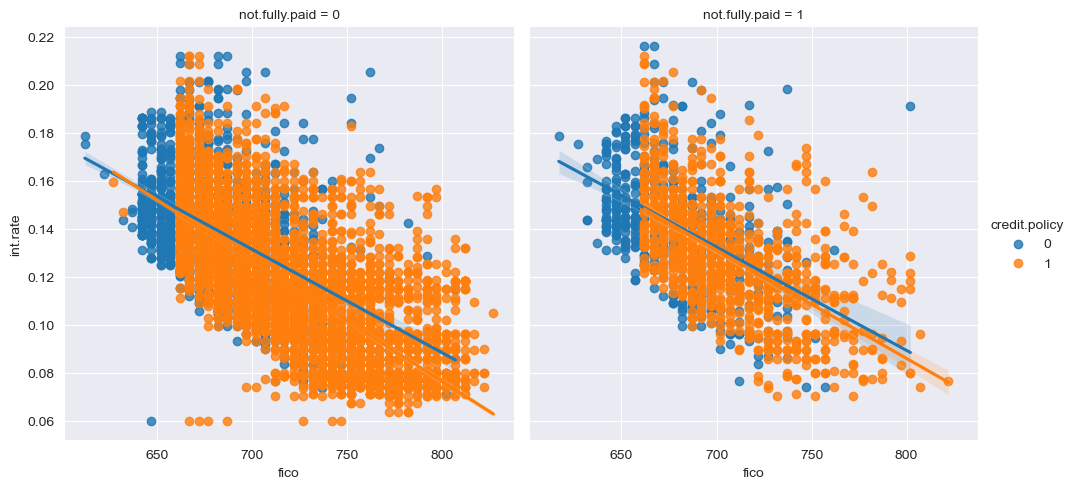

In [22]:
#understanding the rlationship between credit.policy and not.fully.paid
sns.lmplot(data=df,x='fico',y='int.rate',hue='credit.policy',col='not.fully.paid')

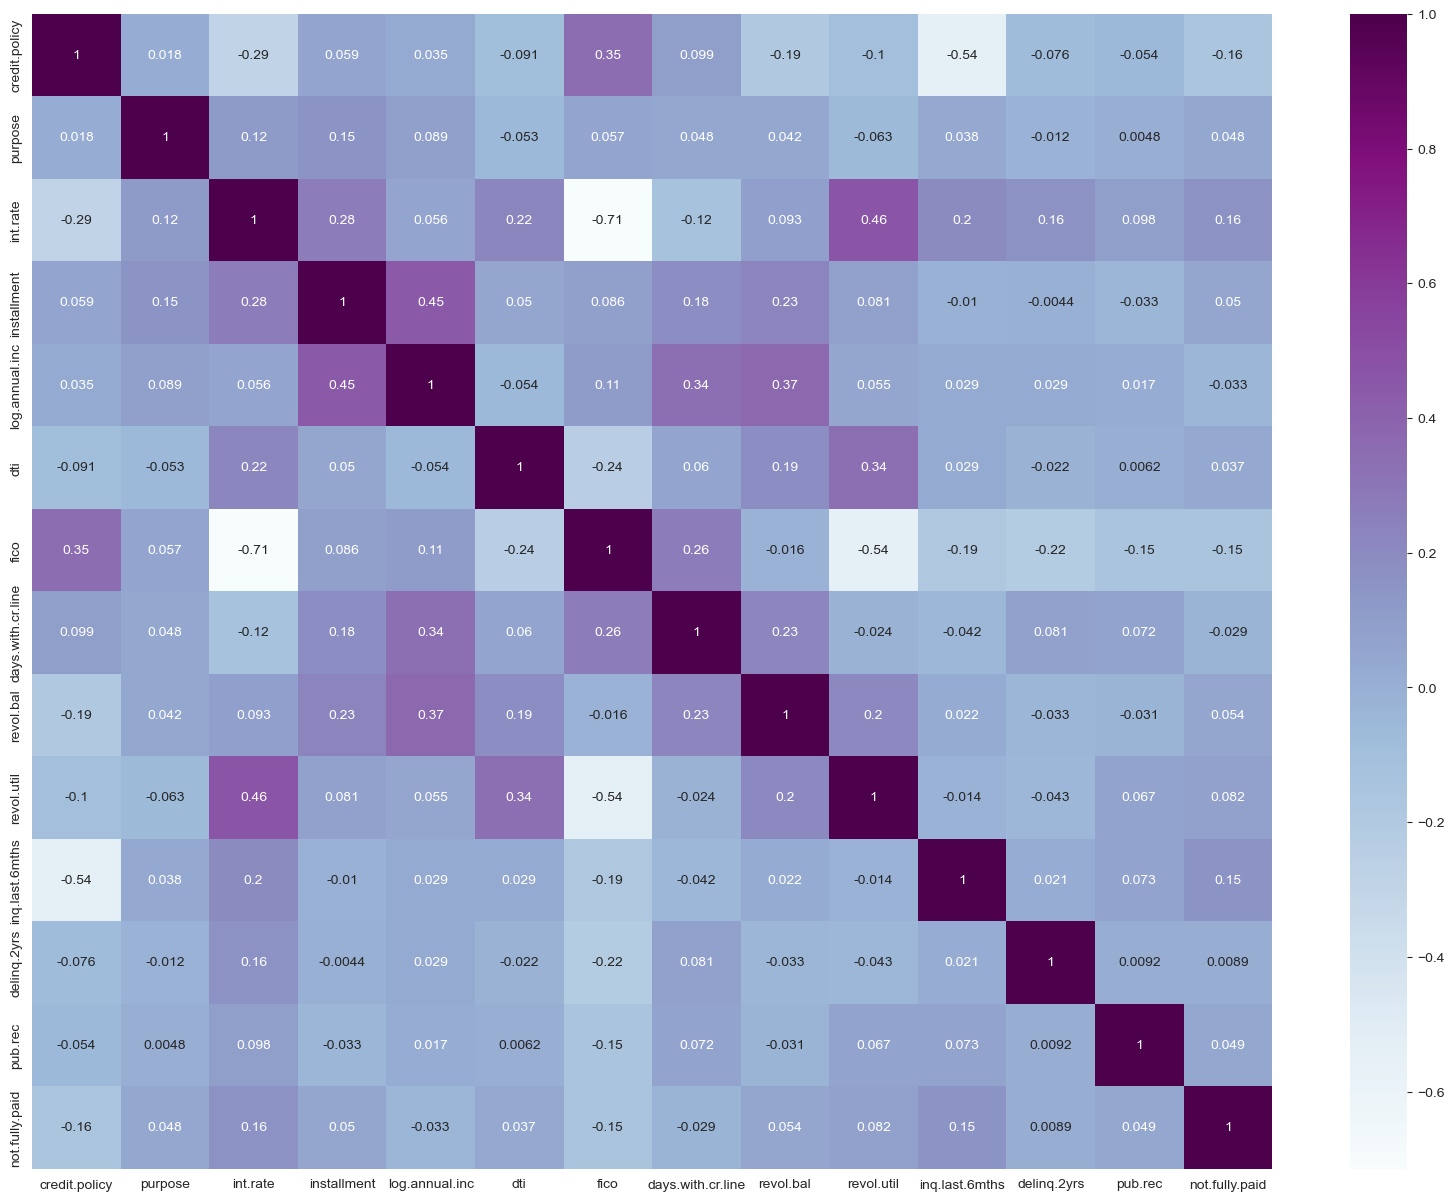

In [23]:
#BuPu means blue to purple
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),cmap='BuPu',annot=True)
plt.show()

In [25]:
#dropping the target class
x=df.drop('not.fully.paid',axis=1)
y=df['not.fully.paid']

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


In [29]:
#choose the algorithm as logistic regression
from sklearn.linear_model import LogisticRegression

# For classification example
model = LogisticRegression()


In [30]:
#for training the model
model.fit(x_train, y_train)


LogisticRegression()

In [31]:
#for making the preictions
y_pred = model.predict(x_test)



In [32]:
#Evaluate the model: Check how well the model performs on the test data using metrics like accuracy, precision, recall for classification, or R-squared, MSE for regression
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))


Accuracy: 0.8385525400139179
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2408
           1       0.56      0.02      0.04       466

    accuracy                           0.84      2874
   macro avg       0.70      0.51      0.47      2874
weighted avg       0.80      0.84      0.77      2874



In [38]:
#by using decision tree 
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],  # Example parameters
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize the DecisionTreeClassifier
df_clf = DecisionTreeClassifier()

# Set up GridSearchCV
grid_search = GridSearchCV(df_clf, param_grid, scoring='recall_weighted', cv=5)

# Fit the grid search
grid_search.fit(x_train, y_train)

# Get the best parameters
print(f'Best parameters: {grid_search.best_params_}')


Best parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2}


In [41]:
df_clf=DecisionTreeClassifier(max_depth=2)
df_clf.fit(x_train,y_train)
y_pred_train=df_clf.predict(x_train)
y_pred_test=df_clf.predict(x_test)
train_accuracy=accuracy_score(y_train,y_pred_train)
test_accuracy=accuracy_score(y_test,y_pred_test)


In [42]:
print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("\n")
print(classification_report(y_test,y_pred_test))
print('train accuracy score:',train_accuracy)
print("test accuracy score:",test_accuracy)


confusion matrix
 [[2408    0]
 [ 466    0]]


              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2408
           1       0.00      0.00      0.00       466

    accuracy                           0.84      2874
   macro avg       0.42      0.50      0.46      2874
weighted avg       0.70      0.84      0.76      2874

train accuracy score: 0.8408412887828163
test accuracy score: 0.83785664578984


In [43]:
#for checking :whether the accuracy rate will increase in future
#bagging
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

# Scaling the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)  # Assuming 'x' is your feature set

# Create a BaggingClassifier with DecisionTreeClassifier as the base estimator
bag_dt = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5))

# Perform cross-validation with recall scoring
score = cross_val_score(estimator=bag_dt, X=x_scaled, y=y, scoring='recall', cv=5)

# Print the mean score
print('Mean Score:', score.mean())


Mean Score: 0.2006514657980456


In [47]:
#adaptive boosting 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize AdaBoost with a DecisionTreeClassifier as the base estimator
adaboost_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=1.0)

# Train the model
adaboost_clf.fit(x_train, y_train)

# Print the training and test scores
print('Train score: {0:.2f}'.format(adaboost_clf.score(x_train, y_train)))
print('Test score: {0:.2f}'.format(adaboost_clf.score(x_test, y_test)))
#the train scrore will increase the test scroe atuomaticall decrease so it has the same average of accuracy




Train score: 0.92
Test score: 0.79


In [48]:
#random forest classifier

from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(n_estimators=600)
rf_clf.fit(x_train,y_train)
y_pred_train=rf_clf.predict(x_train)
y_pred_test=rf_clf.predict(x_test)
train_accuracy=accuracy_score(y_train,y_pred_train)
test_accuracy=accuracy_score(y_test,y_pred_test)

In [49]:
print("confusion matrix:",confusion_matrix(y_test,y_pred_test))
print("\n")
print(classification_report(y_test,y_pred_test))
print("\n")

confusion matrix: [[2395   13]
 [ 457    9]]


              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2408
           1       0.41      0.02      0.04       466

    accuracy                           0.84      2874
   macro avg       0.62      0.51      0.47      2874
weighted avg       0.77      0.84      0.77      2874





In [50]:
#adaptive boostig for random forest classifier

from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

# Initialize the RandomForestClassifier as the base estimator
rf_base_estimator = RandomForestClassifier(n_estimators=10, max_depth=2, random_state=42)

# Initialize AdaBoost with RandomForestClassifier as the base estimator
adaboost_clf = AdaBoostClassifier(base_estimator=rf_base_estimator, learning_rate=0.5)

# Train the model
adaboost_clf.fit(x_train, y_train)

# Print the training and test scores
print('Train score: {0:.2f}'.format(adaboost_clf.score(x_train, y_train)))
print('Test score: {0:.2f}'.format(adaboost_clf.score(x_test, y_test)))


Train score: 0.85
Test score: 0.84


In [51]:
#radient boositing for random forest classifier
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gb_clf.fit(x_train, y_train)

# Print the training and test scores
print('Train score: {0:.2f}'.format(gb_clf.score(x_train, y_train)))
print('Test score: {0:.2f}'.format(gb_clf.score(x_test, y_test)))


Train score: 0.85
Test score: 0.83
